In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

My original model:

In [2]:
yelp = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

# Enumerate our spammy keywords.
keywords = ['generous', 'amazing', 'awesome', 'nice', 'clean', 'perfect',
           'friendly','pleased','perfectly']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

data = yelp[keywords]
target = yelp['label']

from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

1st confusion matrix:

In [3]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[493,   7],
       [443,  57]], dtype=int64)

In [4]:
print("Accuracy: {}".format(
    (target == y_pred).sum()/data.shape[0]*100
))

Accuracy: 55.00000000000001


Trying to boost the model by adding a feature:

In [5]:
yelp = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

# Enumerate our spammy keywords.
keywords = ['generous', 'amazing', 'awesome', 'nice', 'clean', 'perfect',
           'friendly','pleased','perfectly','excellent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

data = yelp[keywords]
target = yelp['label']

from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[493,   7],
       [435,  65]], dtype=int64)

In [7]:
print("Accuracy: {}".format(
    (target == y_pred).sum()/data.shape[0]*100
))

Accuracy: 55.800000000000004


The second model did slightly better. Let's add more features.

In [8]:
yelp = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

# Enumerate our spammy keywords.
keywords = ['generous', 'amazing', 'awesome', 'nice', 'clean', 'perfect',
           'friendly','pleased','perfectly','excellent','quality']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

data = yelp[keywords]
target = yelp['label']

from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[493,   7],
       [435,  65]], dtype=int64)

In [10]:
print("Accuracy: {}".format(
    (target == y_pred).sum()/data.shape[0]*100
))

Accuracy: 55.800000000000004


In [11]:
yelp = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

# Enumerate our spammy keywords.
keywords = ['generous', 'amazing', 'awesome', 'nice', 'clean', 'perfect',
           'friendly','pleased','perfectly','excellent','quality','love']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

data = yelp[keywords]
target = yelp['label']

from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[490,  10],
       [424,  76]], dtype=int64)

In [13]:
print("Accuracy: {}".format(
    (target == y_pred).sum()/data.shape[0]*100
))

Accuracy: 56.599999999999994


Now let's try to remove features that aren't helping.

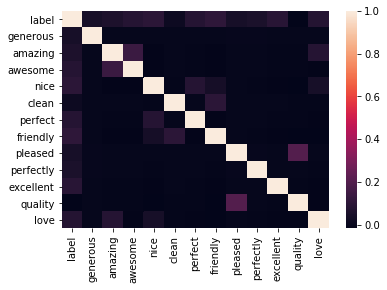

In [14]:
sns.heatmap(yelp.corr())

"Pleased" and "Quality" seem to be a bit correlated. Let's remove "Quality" and test accuracy.

In [15]:
yelp = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

# Enumerate our spammy keywords.
keywords = ['generous', 'amazing', 'awesome', 'nice', 'clean', 'perfect',
           'friendly','pleased','perfectly','excellent','love']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

data = yelp[keywords]
target = yelp['label']

from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[490,  10],
       [424,  76]], dtype=int64)

In [19]:
print("Accuracy: {}".format(
    (target == y_pred).sum()/data.shape[0]*100
))

Accuracy: 56.599999999999994
